## 📌 Load Needed Imports and Libraries
---

In [1]:
# needed imports

# for loading files
import os

# for handling raw data
import json

# for dataframe manipulations
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# for pre-processing
import re
from ast import literal_eval
from bs4 import BeautifulSoup
from sklearn.preprocessing import MultiLabelBinarizer

## 📌 Load Video Game Data
---

In [2]:
datapath = r'C:\Users\Melzarr\OneDrive\Desktop\THESIS\sp_multilabel_vggtc\data_collection\final_collection\final_data2'

sample_vgdata1 = datapath + r'\data0_s40856.csv'
sample_vgdata2 = datapath + r'\data50000_s26445.csv'
sample_vgdata3 = datapath + r'\data100000_s34234.csv'
sample_vgdata4 = datapath + r'\data150000_s38936.csv'
sample_vgdata5 = datapath + r'\data200000_s21471.csv'

df1 = pd.read_csv(sample_vgdata1)
df2 = pd.read_csv(sample_vgdata2)
df3 = pd.read_csv(sample_vgdata3)
df4 = pd.read_csv(sample_vgdata4)
df5 = pd.read_csv(sample_vgdata5)

vgame0_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [3]:
vgame0_df.head(5)

,id,name,summary,genre_count,genre_list,genre_ids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12]


## 📌 Clean Video Game Text Summary  
---

In [4]:
import string
from nltk.corpus import stopwords

def light_cleaning(x):
    # first we lowercase everything
    x = x.lower()
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    # then use regex to remove @ symbols and hashtags
    x = re.sub(r'@\S', '', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    # remove single letters and numbers surrounded by space
    # x = re.sub(r'\s[a-z]\s|\s[0-9]\s', ' ', x)
    return x

def heavy_cleaning(x):
    # first we lowercase everything
    x = x.lower()
    x = ' '.join([word for word in x.split(' ') if word not in stopwords])
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    # then use regex to remove @ symbols and hashtags
    x = re.sub(r'@\S', '', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    # remove single letters and numbers surrounded by space
    x = re.sub(r'\s[a-z]\s|\s[0-9]\s', ' ', x)
    return x

In [5]:
vgame0_df['clean_summary'] = vgame0_df['summary'].apply(light_cleaning)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]",the ultimate thief is back tread softly as you...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]",thief is a first person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]",in the third instalment of the thief series ma...
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]",there is a rising tide of fear in the city hat...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12],baldur gate is a fantasy role playing video ga...
...,...,...,...,...,...,...,...
161937,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"['Strategy', 'Indie']","[15, 32]",experience the thrill of a modern conflict bet...
161938,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"['Adventure', 'Indie']","[31, 32]",the main character kaori is on a date boyfrien...
161939,234019,Forest Life,Players will play as five different characters...,2,"['Role-playing (RPG)', 'Indie']","[12, 32]",players will play as five different characters...
161940,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[""Hack and slash/Beat 'em up"", 'Arcade']","[25, 33]",streets of rage silent hill is a fan game deve...


## 📌 Convert Stringed `genre_list` to Pythonic List
---

In [6]:
vgame0_df['genre_list'] = vgame0_df['genre_list'].apply(literal_eval)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back tread softly as you...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",in the third instalment of the thief series ma...
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city hat...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role playing video ga...
...,...,...,...,...,...,...,...
161937,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...
161938,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...
161939,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...
161940,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage silent hill is a fan game deve...


## 📌 EDA Proper
---

##### 📝 **Get Word Count of Text Summary**
This includes word counts for before and after video game summary text cleaning

count    161942.000000
mean         49.884669
std          50.718504
min           1.000000
25%          21.000000
50%          38.000000
75%          57.000000
max        1632.000000
dtype: float64

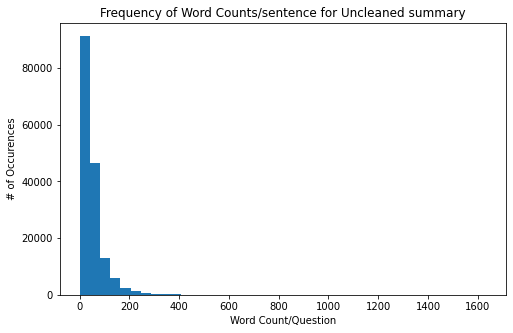

In [7]:
# for unclean text
summary_series = vgame0_df['summary']
word_count = [len(sentence.split()) for sentence in summary_series]

display(pd.Series(word_count).describe())

# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(word_count, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence for Uncleaned summary")
plt.show()

In [8]:
# get games with clean_summary that is less than 10 words
filtered_summaries = vgame0_df[vgame0_df['clean_summary'].apply(lambda x: len(x.split()) <= 10)]
# filtered_summaries.to_csv('filtered_summaries.csv', index=False) # uncomment if you want to see the filtered summaries
filtered_summaries

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
104,105,Need for Speed: Hot Pursuit,Become Seacrest County's top cop or most wante...,1,[Racing],[10],become seacrest county top cop or most wanted ...
164,167,Star Wars: TIE Fighter - Defender of the Empire,Defender of the Empire adds 3 new Tours of Duty,1,[Simulator],[13],defender of the empire adds new tours of duty
257,268,Deer Hunter 3D,The Deer Hunter series goes mobile courtesy of...,3,"[Shooter, Simulator, Sport]","[5, 13, 14]",the deer hunter series goes mobile courtesy of...
258,269,Deer Hunter Challenge,Another mobile Deer Hunter.,3,"[Shooter, Simulator, Sport]","[5, 13, 14]",another mobile deer hunter
607,631,Chessmaster 5500,Chessmaster 5500 is an updated version of Ches...,2,"[Sport, Strategy]","[14, 15]",chessmaster is an updated version of chessmaster
...,...,...,...,...,...,...,...
161861,233870,Hi Pizza,"Soft, fairy tale, whimsical, click to decrypt.",4,"[Role-playing (RPG), Strategy, Adventure, Indie]","[12, 15, 31, 32]",soft fairy tale whimsical click to decrypt
161867,233880,Side Scape,"A light-hearted, Side-Scroller/ Top-Down hybrid!",2,"[Adventure, Indie]","[31, 32]",a light hearted side scroller top down hybrid
161879,233894,Vacation Adventures: Park Ranger 13 - Collecto...,Help run Pinecreek Hills and New England's Min...,2,"[Adventure, Indie]","[31, 32]",help run pinecreek hills and new england minut...
161894,233918,Uppy Cup,Keep the ball in the air! Challenge your friends!,1,[Sport],[14],keep the ball in the air challenge your friends


In [9]:
# filter vgame0_df to only contain clean_summary with more than 10 words
vgame0_df = vgame0_df[vgame0_df['clean_summary'].apply(lambda x: len(x.split()) > 10)].copy().reset_index(drop=True)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back tread softly as you...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",in the third instalment of the thief series ma...
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city hat...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role playing video ga...
...,...,...,...,...,...,...,...
146492,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...
146493,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...
146494,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...
146495,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage silent hill is a fan game deve...


count    146497.000000
mean         54.196680
std          50.888275
min          11.000000
25%          26.000000
50%          40.000000
75%          61.000000
max        1615.000000
dtype: float64

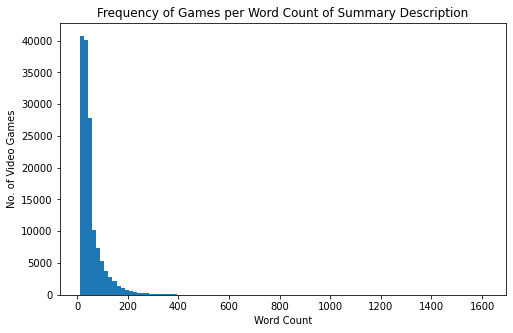

In [51]:
# for clean text
cleansummary_series = vgame0_df['clean_summary']
cleanword_count = [len(sentence.split()) for sentence in cleansummary_series]

display(pd.Series(cleanword_count).describe())

# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(cleanword_count, bins = 100)
plt.xlabel('Word Count')
plt.ylabel('No. of Video Games')
plt.title("Frequency of Games per Word Count of Summary Description")
plt.show()

##### 📝 **Get Genre Type Counts**
This includes the before and after the reduction of labels

Text(0.5, 0, '# of Games')

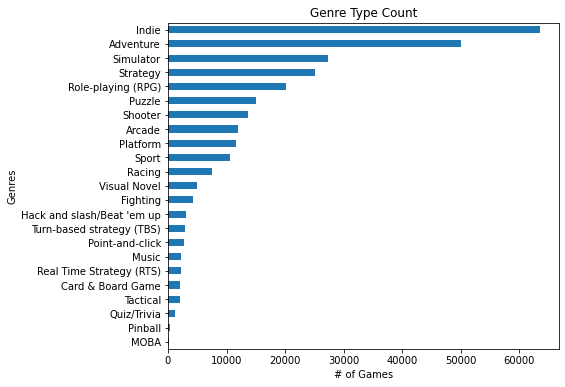

In [11]:
genrelist_copy = vgame0_df['genre_list'].explode('genre_list').reset_index(drop=True)
genretype_count = genrelist_copy.value_counts()
genretype_count = genretype_count.iloc[::-1]

genretype_count.plot(kind='barh', title='Genre Type Count', figsize=(7,6), xlabel='Genres')
plt.xlabel('# of Games')

In [12]:
genretype_count

MOBA                            113
Pinball                         429
Quiz/Trivia                    1124
Tactical                       2117
Card & Board Game              2131
Real Time Strategy (RTS)       2155
Music                          2177
Point-and-click                2824
Turn-based strategy (TBS)      2928
Hack and slash/Beat 'em up     3033
Fighting                       4200
Visual Novel                   4931
Racing                         7497
Sport                         10555
Platform                      11617
Arcade                        12026
Shooter                       13665
Puzzle                        14975
Role-playing (RPG)            20147
Strategy                      25179
Simulator                     27259
Adventure                     50082
Indie                         63507
Name: genre_list, dtype: int64

In [13]:
# update genre_list because they are too many
adventure = ['Adventure', 'Visual Novel', 'Point-and-click']
action = ['Shooter', 'Platform', 'Hack and slash/Beat \'em up', 'Fighting']
arcade = ['Arcade', 'Pinball']
cardboard = ['Card & Board Game']
indie = ['Indie']
puzzle = ['Puzzle', 'Music']
quiz = ['Quiz/Trivia']
rpg = ['Role-playing (RPG)']
simulation = ['Sport', 'Simulator', 'Racing']
strategy = ['Strategy',  'Real Time Strategy (RTS)', 'Tactical', 'Turn-based strategy (TBS)', 'MOBA']

def convert_names(genre_list):
    genrelist_dict ={'adventure': adventure, 'action': action, 'arcade': arcade, 'cardboard': cardboard, 'indie': indie, 
                  'puzzle': puzzle, 'quiz': quiz, 'rpg': rpg, 'simulation': simulation, 'strategy': strategy}
    newlist = []
    
    for key in genrelist_dict:
        if any(genre in genre_list for genre in genrelist_dict[key]):
            newlist.append(key)

    return newlist

def convert_ids(genre_names):
    genreids_dict = {'adventure': 0, 'action': 1, 'arcade': 2, 'cardboard': 3, 'indie': 4, 
                  'puzzle': 5, 'quiz': 6, 'rpg': 7, 'simulation': 8, 'strategy': 9}
    newids = []
    
    for i in genre_names:
        newids.append(genreids_dict[i])
    
    return newids

In [14]:
vgame0_df['new_genrelist'] = vgame0_df['genre_list'].apply(convert_names)
vgame0_df['new_genreids'] = vgame0_df['new_genrelist'].apply(convert_ids)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary,new_genrelist,new_genreids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back tread softly as you...,"[adventure, action, simulation]","[0, 1, 8]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first person stealth game that like...,"[adventure, simulation]","[0, 8]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",in the third instalment of the thief series ma...,"[adventure, action, simulation]","[0, 1, 8]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city hat...,"[adventure, action]","[0, 1]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role playing video ga...,[rpg],[7]
...,...,...,...,...,...,...,...,...,...
146492,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...,"[indie, strategy]","[4, 9]"
146493,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...,"[adventure, indie]","[0, 4]"
146494,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...,"[indie, rpg]","[4, 7]"
146495,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage silent hill is a fan game deve...,"[action, arcade]","[1, 2]"


In [15]:
# uncomment if you want to see the clean text

# vgame0_df.to_csv('clean_test2.csv', index=False)

indie         63507
adventure     53722
simulation    38469
action        29444
strategy      27302
rpg           20147
puzzle        16872
arcade        12344
cardboard      2131
quiz           1124
Name: new_genrelist, dtype: int64


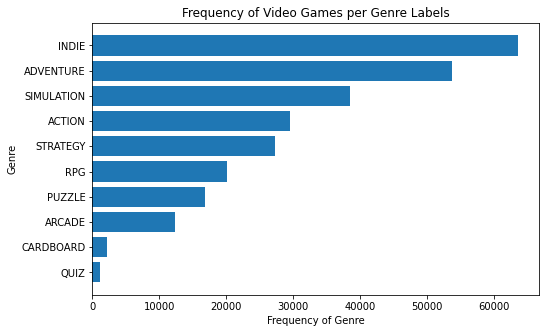

In [94]:
newgenrelist_copy = vgame0_df['new_genrelist'].explode('new_genrelist').reset_index(drop=True)
newgenretype_count = newgenrelist_copy.value_counts()
print(newgenretype_count)

# newgenretype_count.plot(kind='barh', title='Frequency of Video Games per Genre Labels', xlabel='Genre', ylabel='Frequency of Genre')
# plt.xlabel('No. of Video Games')

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(newgenretype_count.index, newgenretype_count.values, align='center')
ax.invert_yaxis()
ax.set_title('Frequency of Video Games per Genre Labels')
ax.set_xlabel('Frequency of Genre')
ax.set_ylabel('Genre')

# capitalize y-axis labels
labels = [label.get_text().upper() for label in ax.get_yticklabels()]
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

plt.show()

##### 📝 **Get Genre Count Frequency**
This includes the before and after the reduction of labels

1     62386
2     47234
3     24224
4      9138
5      2760
6       571
7       138
8        33
9         8
10        3
20        1
15        1
Name: genre_count, dtype: int64
146497


<AxesSubplot: title={'center': 'Genre Frequency Count'}, xlabel='# of Genres per Game', ylabel='# of Games'>

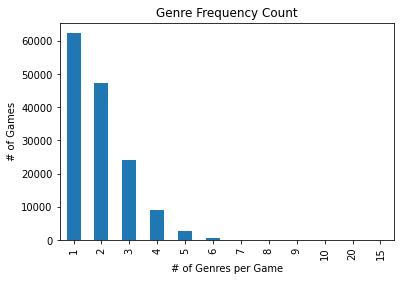

In [17]:
genrecount_freq = pd.value_counts(vgame0_df['genre_count'])
print(genrecount_freq)
print(genrecount_freq.sum())

genrecount_freq.plot(kind='bar', title='Genre Frequency Count', xlabel='# of Genres per Game', ylabel='# of Games')

In [18]:
vgame0_df['new_genrecount'] = vgame0_df['new_genrelist'].str.len()
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary,new_genrelist,new_genreids,new_genrecount
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back tread softly as you...,"[adventure, action, simulation]","[0, 1, 8]",3
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first person stealth game that like...,"[adventure, simulation]","[0, 8]",2
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",in the third instalment of the thief series ma...,"[adventure, action, simulation]","[0, 1, 8]",3
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city hat...,"[adventure, action]","[0, 1]",2
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role playing video ga...,[rpg],[7],1
...,...,...,...,...,...,...,...,...,...,...
146492,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...,"[indie, strategy]","[4, 9]",2
146493,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...,"[adventure, indie]","[0, 4]",2
146494,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...,"[indie, rpg]","[4, 7]",2
146495,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage silent hill is a fan game deve...,"[action, arcade]","[1, 2]",2


146497


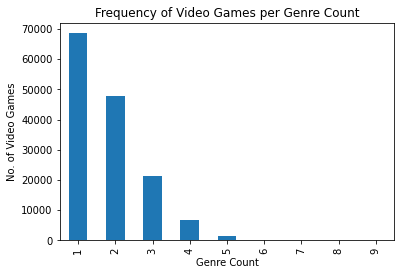

In [102]:
newgenrecount_freq = pd.value_counts(vgame0_df['new_genrecount'])
newgenrecount_freq = newgenrecount_freq.sort_index()
print(newgenrecount_freq.sum())

# create a figure with one subplot
fig, ax = plt.subplots()

# create a bar chart on the subplot
newgenrecount_freq.plot(kind='bar', ax=ax)

# set the title, xlabel, and ylabel
ax.set_title('Frequency of Video Games per Genre Count')
ax.set_xlabel('Genre Count')
ax.set_ylabel('No. of Video Games')

# display the plot
plt.show()

In [103]:
print(newgenrecount_freq)

1    68546
2    47877
3    21466
4     6909
5     1494
6      180
7       23
8        1
9        1
Name: new_genrecount, dtype: int64


##### 📝 **Word Cloud for Each Genre Type**

In [20]:
from wordcloud import WordCloud, STOPWORDS

my_stopwords = set(['game', 'games', 'level', 'levels', 'player', 'players', 'play', 'plays', 'world', 'will', 'one', 'new', 'way'])
STOPWORDS = STOPWORDS.union(my_stopwords)

def generate_wordcloud(genre_type:str):

    plt.figure(figsize=(12, 7))

    textsummary_df = vgame0_df[vgame0_df['new_genrelist'].apply(lambda genrelist: genre_type in genrelist)]

    text = " ".join(review for review in textsummary_df['clean_summary'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

    return wordcloud

In [21]:
columns = ['adventure', 'action', 'arcade', 'cardboard', 'indie', 'puzzle', 'quiz', 'rpg', 'simulation', 'strategy']
dict_sample = {}

for genre in columns:
    dict_sample[genre] = generate_wordcloud(genre)

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

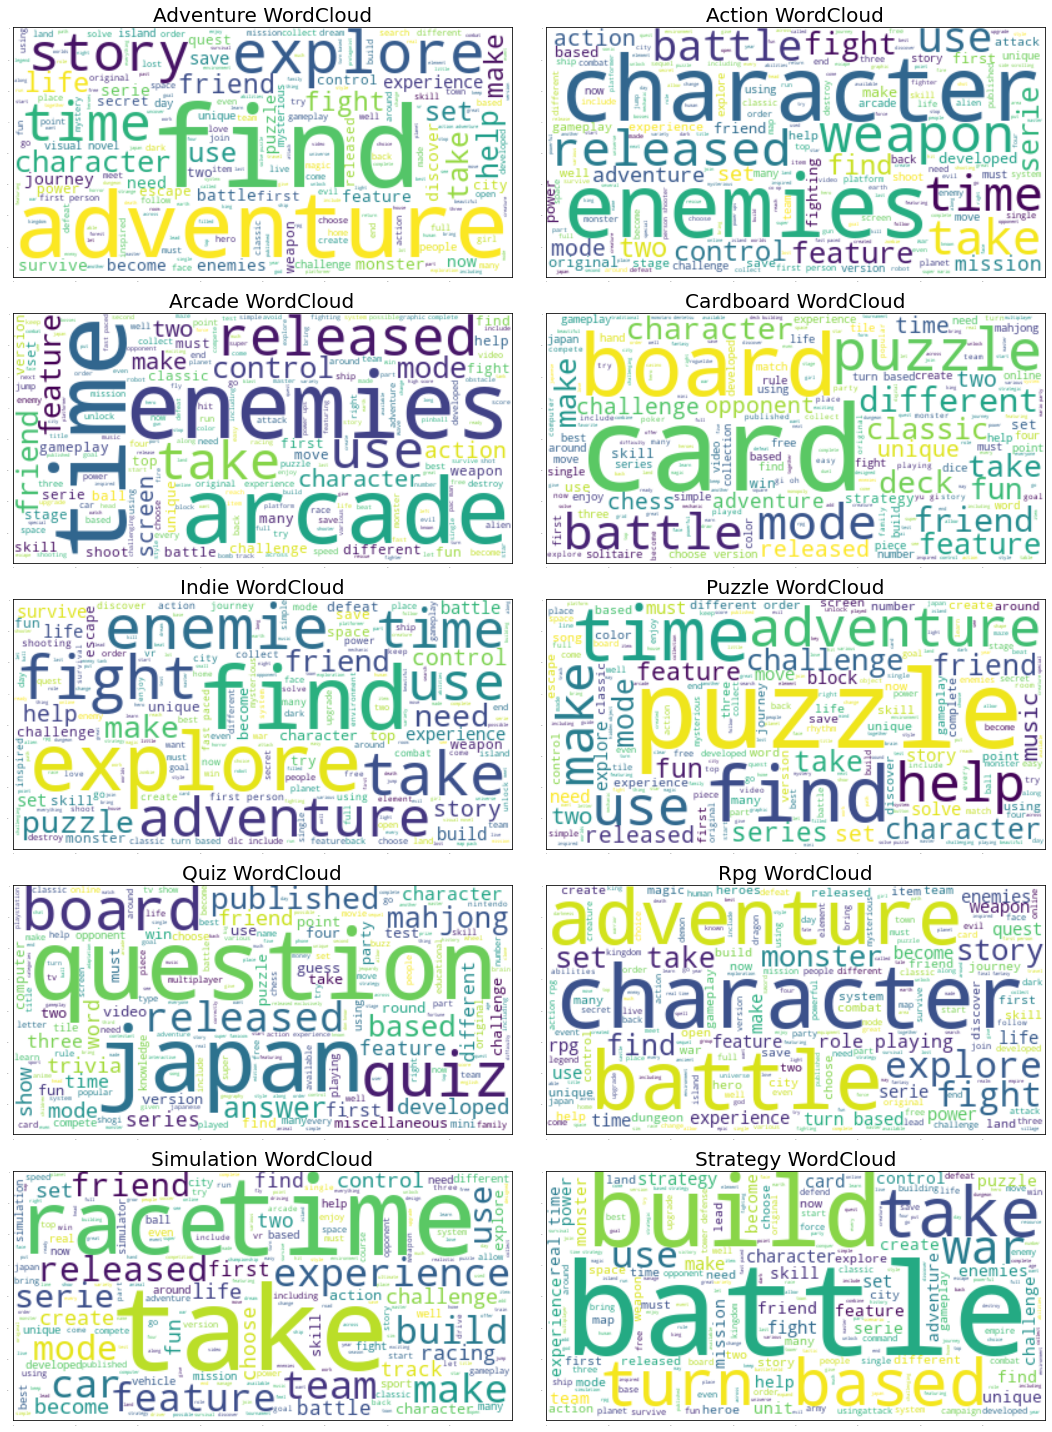

In [22]:
row = 2
col = 5
fig, axs = plt.subplots(col, row, figsize=(15,20))

ctr = 0

for y in range(col):
    for x in range(row):
        axs[y][x].imshow(dict_sample[columns[ctr]], interpolation="bilinear")
        axs[y][x].tick_params(axis='both', which='both', length=0, labelsize=0)
        axs[y][x].set_title(f'{columns[ctr].capitalize()} WordCloud', fontsize=20)
        ctr+=1

# Show plot
plt.tight_layout()
plt.show()

## 📌 Multilabel Binarization
---

In [23]:
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(vgame0_df['new_genrelist'])
yt.shape

(146497, 10)

In [24]:
print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[1 1 0 0 0 0 0 0 1 0]
[('action', 'adventure', 'simulation')]
['action' 'adventure' 'arcade' 'cardboard' 'indie' 'puzzle' 'quiz' 'rpg'
 'simulation' 'strategy']


In [25]:
yt

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

## 📌 Finalization and Splitting of Data
---

In [26]:
binarized_df = pd.DataFrame(yt, columns=mlb.classes_)
binarized_df

,action,adventure,arcade,cardboard,indie,puzzle,quiz,rpg,simulation,strategy
0,1,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
146492,0,0,0,0,1,0,0,0,0,1
146493,0,1,0,0,1,0,0,0,0,0
146494,0,0,0,0,1,0,0,1,0,0
146495,1,0,1,0,0,0,0,0,0,0


In [27]:
merged = pd.concat([vgame0_df, binarized_df], axis=1)
merged.head()

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary,new_genrelist,new_genreids,new_genrecount,action,adventure,arcade,cardboard,indie,puzzle,quiz,rpg,simulation,strategy
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back tread softly as you...,"[adventure, action, simulation]","[0, 1, 8]",3,1,1,0,0,0,0,0,0,1,0
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first person stealth game that like...,"[adventure, simulation]","[0, 8]",2,0,1,0,0,0,0,0,0,1,0
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",in the third instalment of the thief series ma...,"[adventure, action, simulation]","[0, 1, 8]",3,1,1,0,0,0,0,0,0,1,0
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city hat...,"[adventure, action]","[0, 1]",2,1,1,0,0,0,0,0,0,0,0
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role playing video ga...,[rpg],[7],1,0,0,0,0,0,0,0,1,0,0


,action,adventure,arcade,cardboard,indie,puzzle,quiz,rpg,simulation,strategy
0,0.799013,0.633289,0.915739,0.985454,0.566496,0.88483,0.992327,0.862475,0.737408,0.813634
1,0.200987,0.366711,0.084261,0.014546,0.433504,0.11517,0.007673,0.137525,0.262592,0.186366


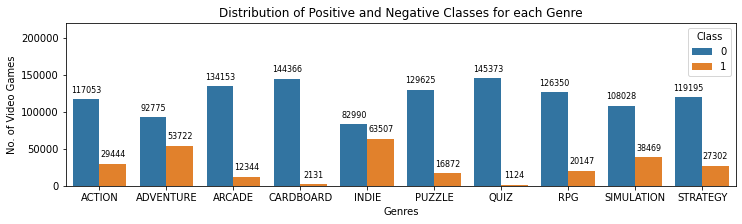

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_cols = ['action','adventure','arcade','cardboard','indie','puzzle','quiz','rpg','simulation','strategy']

display(merged[genre_cols].apply(lambda x: x.value_counts(normalize=True)))

plt.figure(figsize=(12,3))
ax = sns.countplot(x="variable", hue="value", data=pd.melt(merged[genre_cols]))
ax.set_ylim(0,220000)
ax.set_xlabel('Genres')
ax.set_ylabel('No. of Video Games')
legend = ax.legend(title='Class')
ax.set_title('Distribution of Positive and Negative Classes for each Genre')

# set x-axis labels to uppercase
ax.set_xticklabels([label.get_text().upper() for label in ax.get_xticklabels()])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, fontsize=8)

plt.show()

##### 📝 **Separate Feature (X) and Target (y) values**

In [28]:
summary_data = merged[['id', 'clean_summary']]
genretag_data = merged[['id', 'new_genrelist','action', 'adventure', 'arcade', 'cardboard', 'indie', 'puzzle', 'quiz', 'rpg', 'simulation', 'strategy']]

summary_data

,id,clean_summary
0,1,the ultimate thief is back tread softly as you...
1,2,thief is a first person stealth game that like...
2,3,in the third instalment of the thief series ma...
3,4,there is a rising tide of fear in the city hat...
4,5,baldur gate is a fantasy role playing video ga...
...,...,...
146492,234017,experience the thrill of a modern conflict bet...
146493,234018,the main character kaori is on a date boyfrien...
146494,234019,players will play as five different characters...
146495,234020,streets of rage silent hill is a fan game deve...


In [29]:
genretag_data

,id,new_genrelist,action,adventure,arcade,cardboard,indie,puzzle,quiz,rpg,simulation,strategy
0,1,"[adventure, action, simulation]",1,1,0,0,0,0,0,0,1,0
1,2,"[adventure, simulation]",0,1,0,0,0,0,0,0,1,0
2,3,"[adventure, action, simulation]",1,1,0,0,0,0,0,0,1,0
3,4,"[adventure, action]",1,1,0,0,0,0,0,0,0,0
4,5,[rpg],0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
146492,234017,"[indie, strategy]",0,0,0,0,1,0,0,0,0,1
146493,234018,"[adventure, indie]",0,1,0,0,1,0,0,0,0,0
146494,234019,"[indie, rpg]",0,0,0,0,1,0,0,1,0,0
146495,234020,"[action, arcade]",1,0,1,0,0,0,0,0,0,0


In [30]:
# Uncomment if you want unbroken summary and label (unsplitted) dataset CSV files.

# summary_data.to_csv('./final_data(3)/summary-data.csv', index=False)
# genretag_data.to_csv('./final_data(3)/genre-tag-data.csv', index=False)

##### 📝 **Splitting of Dataset**
80% Training Set / 10% Testing Set / 10% Validation Set

In summary, the training set is used to train the model, the validation set is used to tune the hyperparameters of the model, and the testing set is used to evaluate the final performance of the model. It is important to keep these sets separate and not to use the testing set for training or validation, as this can lead to overfitting and inaccurate performance estimates.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(summary_data, genretag_data, train_size=0.8, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [32]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}\n')

print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}\n')

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}\n')

X_train shape: (117197, 2)
y_train shape: (117197, 12)

X_val shape: (14650, 2)
y_val shape: (14650, 12)

X_test shape: (14650, 2)
y_test shape: (14650, 12)



In [33]:
display(X_train)
display(y_train)

,id,clean_summary
107728,168317,a grid based single local multiplayer strategy...
49685,72558,top view racing game for wiiware by the makers...
10543,11700,the idolmaster dearly stars is a japanese life...
130774,206543,my daughter who was supposed to be dead is rig...
113259,176096,espn baseball tonight is a baseball game with ...
...,...,...
41993,54969,kero kero king is the predecessor to ribbit ki...
97639,155469,mighty chameleon brothers will remind you of o...
95939,153182,take control of one of the iconic british loco...
117952,187202,alchemist of war is a casual card game with cr...


,id,new_genrelist,action,adventure,arcade,cardboard,indie,puzzle,quiz,rpg,simulation,strategy
107728,168317,[strategy],0,0,0,0,0,0,0,0,0,1
49685,72558,[simulation],0,0,0,0,0,0,0,0,1,0
10543,11700,"[puzzle, simulation]",0,0,0,0,0,1,0,0,1,0
130774,206543,"[indie, simulation]",0,0,0,0,1,0,0,0,1,0
113259,176096,[simulation],0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41993,54969,[simulation],0,0,0,0,0,0,0,0,1,0
97639,155469,[indie],0,0,0,0,1,0,0,0,0,0
95939,153182,[simulation],0,0,0,0,0,0,0,0,1,0
117952,187202,[indie],0,0,0,0,1,0,0,0,0,0


In [34]:
display(X_test)
display(y_test)

,id,clean_summary
108463,169256,visit a variety of water attractions with jasm...
27123,33905,how to play a game that doesn want to be playe...
54213,81241,these are the last days of the first planet ex...
6031,6601,it time to get the party started right with so...
48494,69434,is a non interactive short simple story follow...
...,...,...
99851,158107,disc golf valley is home to some of the most b...
40927,52238,sequel to the hit game happy wars a game that ...
104871,164170,driiift your way through tons of obstacles and...
84312,137139,select characters have been chosen to debut as...


,id,new_genrelist,action,adventure,arcade,cardboard,indie,puzzle,quiz,rpg,simulation,strategy
108463,169256,"[adventure, indie]",0,1,0,0,1,0,0,0,0,0
27123,33905,"[indie, puzzle]",0,0,0,0,1,1,0,0,0,0
54213,81241,[adventure],0,1,0,0,0,0,0,0,0,0
6031,6601,"[arcade, simulation]",0,0,1,0,0,0,0,0,1,0
48494,69434,"[adventure, indie]",0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99851,158107,[simulation],0,0,0,0,0,0,0,0,1,0
40927,52238,[rpg],0,0,0,0,0,0,0,1,0,0
104871,164170,"[indie, simulation]",0,0,0,0,1,0,0,0,1,0
84312,137139,"[puzzle, strategy]",0,0,0,0,0,1,0,0,0,1


In [35]:
display(X_val)
display(y_val)

,id,clean_summary
126799,200226,a new legend begins here build and manage a to...
32734,41173,meet barnsley a lazy good for nothing badger w...
95242,152370,fire up a wild ride across the cosmos with a f...
113251,176087,a special bonus disc that contained the both t...
67576,112354,kings cross a unique mix of strategy rpg and t...
...,...,...
61203,99781,own the child of light ultimate edition with t...
140720,224411,a side scroller adventure game with a slight t...
10001,11099,welcome to the chess game of tomorrow yesterye...
43718,58727,a capcom developed adventure game released exc...


,id,new_genrelist,action,adventure,arcade,cardboard,indie,puzzle,quiz,rpg,simulation,strategy
126799,200226,"[adventure, rpg, simulation, strategy]",0,1,0,0,0,0,0,1,1,1
32734,41173,"[adventure, action]",1,1,0,0,0,0,0,0,0,0
95242,152370,"[adventure, action, rpg]",1,1,0,0,0,0,0,1,0,0
113251,176087,[adventure],0,1,0,0,0,0,0,0,0,0
67576,112354,"[indie, strategy]",0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
61203,99781,"[adventure, action, rpg, strategy]",1,1,0,0,0,0,0,1,0,1
140720,224411,"[adventure, action, indie, puzzle]",1,1,0,0,1,1,0,0,0,0
10001,11099,"[cardboard, strategy]",0,0,0,1,0,0,0,0,0,1
43718,58727,[adventure],0,1,0,0,0,0,0,0,0,0


##### 📝 **Little EDA for Train, Test, and Validation Sets**

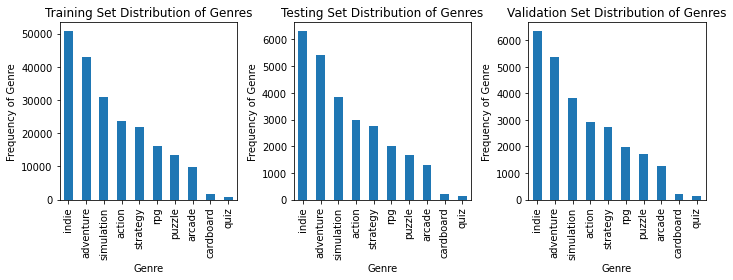

In [36]:
def genre_counter(df):
    genre_count = df['new_genrelist'].explode('new_genrelist').reset_index(drop=True)
    return genre_count.value_counts()
    
training_valuecount = genre_counter(y_train)
testing_valuecount = genre_counter(y_test)
validation_valuecount = genre_counter(y_val)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
training_valuecount.plot(kind='bar', title='Training Set Distribution of Genres', xlabel='Genre', ylabel='Frequency of Genre', ax=ax1)
testing_valuecount.plot(kind='bar', title='Testing Set Distribution of Genres', xlabel='Genre', ylabel='Frequency of Genre', ax=ax2)
validation_valuecount.plot(kind='bar', title='Validation Set Distribution of Genres', xlabel='Genre', ylabel='Frequency of Genre', ax=ax3)
plt.tight_layout()

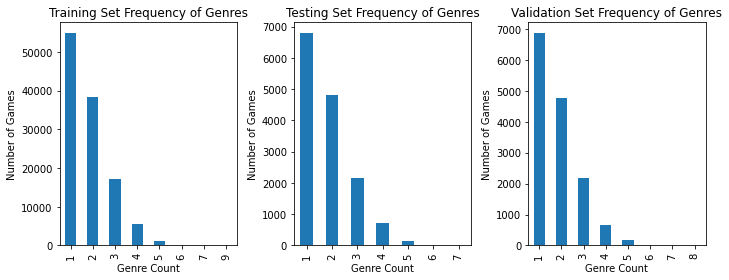

In [37]:
def freq_counter(df):
    freq_count = df['new_genrelist'].apply(len)
    return freq_count.value_counts()

training_freqcount = freq_counter(y_train)
testing_freqcount = freq_counter(y_test)
validation_freqcount = freq_counter(y_val)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
training_freqcount.plot(kind='bar', title='Training Set Frequency of Genres', xlabel='Genre Count', ylabel='Number of Games', ax=ax1)
testing_freqcount.plot(kind='bar', title='Testing Set Frequency of Genres', xlabel='Genre Count', ylabel='Number of Games', ax=ax2)
validation_freqcount.plot(kind='bar', title='Validation Set Frequency of Genres', xlabel='Genre Count', ylabel='Number of Games', ax=ax3)
plt.tight_layout()

##### 📝 **Saving all data possible to CSV**

In [38]:
# Save Train Set CSV
X_train.to_csv('./final_data(3)/X_train.csv', index=False)
y_train.to_csv('./final_data(3)/y_train.csv', index=False)

# Save Test Set CSV
X_test.to_csv('./final_data(3)/X_test.csv', index=False)
y_test.to_csv('./final_data(3)/y_test.csv', index=False)

# Save Validation Set CSV
X_val.to_csv('./final_data(3)/X_val.csv', index=False)
y_val.to_csv('./final_data(3)/y_val.csv', index=False)

# Save the full data incase of model-data incomptability
merged[['id', 'clean_summary', 'new_genrelist'] + columns].to_csv('./final_data(3)/vgame_fulldata.csv', index=False)

In [101]:
print('hello')

hello
